# Import Library

In [1]:
from selenium import webdriver
import time
import requests
import os
import glob
import shutil
from tqdm import tqdm
import pyperclip as pc
from selenium.webdriver.common.keys import Keys
import pyautogui
import re

from bs4 import BeautifulSoup
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import TimeoutException
from time import sleep

import warnings
warnings.filterwarnings("ignore")

import csv
import pygame


pygame 2.1.2 (SDL 2.0.18, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Chrome Driver Path and Mouse Position

In [37]:
print(pyautogui.position())

Point(x=2334, y=330)


In [2]:
PATH= r'E:\app\chrome_driver\chromedriver_win32\\chromedriver.exe'

# Make input List, Picture Donwload, and Get Link Shopee, Write Function

In [39]:
def input_list_link(n):
    list_item = [input() for _ in range(0,n)]
    list_item = list(set(list_item))
    print(f"Banyak list_item: {len(list_item)}")
    return list_item
    
    

In [40]:
def donwload_gambar(list_item,gender_item,name_folder_item,start):
        
    if gender_item==0:
        nama_folder="Pakaian wanita"
    elif gender_item==1:
        nama_folder="Pakaian Pria"
    elif gender_item==2:
        nama_folder = "acc_pria"
    elif gender_item==3:
        nama_folder = "barang estetik"
    else:
        return 0
    
    if not os.path.exists(r"E:\affiliate Shopee"+f"\{nama_folder}\{name_folder_item}"):
        os.mkdir(r"E:\affiliate Shopee"+f"\{nama_folder}\{name_folder_item}")
    
    base_path = r"C:\Users\GEORGE\Downloads"
    driver = webdriver.Chrome(PATH)
    driver.get('https://clickuptuts.com/shopee/cara-download-gambar-produk-di-shopee.php')
    element_input = driver.find_element_by_name("url_produk")
    for i in tqdm(list_item):
        try:
            element_input.clear()
        except:
            element_input = driver.find_element_by_name("url_produk")
            element_input.clear()
            
        time.sleep(1)
        element_input.send_keys(i)
        time.sleep(1)
        driver.find_element_by_css_selector("input[type='submit']").click()
        time.sleep(9)
        #driver.refresh()
       
        driver.find_element_by_xpath("/html/body/p[3]/a").click()
        time.sleep(1)
        try:
            driver.find_element_by_xpath("/html/body/p[5]/a").click()
            time.sleep(1)
        except:
            driver.find_element_by_xpath("/html/body/p[4]/a").click()
            time.sleep(1)
        image_path = glob.glob(base_path+"\*.jpg")#..\\donwload\\123.jpg
        
        dest_path=r"E:\affiliate Shopee"+f"\{nama_folder}\{name_folder_item}"
        
        item_file_path = os.path.join(dest_path,f"{start}") #..\\1157
        
        os.mkdir(item_file_path)
        for i in range(2): 
            rename_file = os.path.join(base_path,f"{i+1}.jpg")
            os.rename(image_path[i],rename_file)
            shutil.move(rename_file,item_file_path)
        
        
        
        time.sleep(4)
        driver.execute_script("window.history.go(-1)")
        time.sleep(4)
        
        start+=1
    driver.quit()
    print("sucess")
    
        
       

In [3]:
def open_shopee():
    driver = webdriver.Chrome(PATH)
    driver.get('https://affiliate.shopee.co.id/offer/custom_link')
    time.sleep(8)
    driver.find_element_by_xpath("/html/body/div[1]/div/div[2]/div/div/form/div/div[2]/div[2]/div[1]/input").send_keys("081805118055")
    time.sleep(1)
    driver.find_element_by_xpath("/html/body/div[1]/div/div[2]/div/div/form/div/div[2]/div[3]/div[1]/input").send_keys("George858595")
    time.sleep(1)
    driver.find_element_by_xpath("/html/body/div[1]/div/div[2]/div/div/form/div/div[2]/button").click()
    time.sleep(7)
    driver.find_element_by_xpath("/html/body/div[1]/div/div[2]/div/div/div/div[1]/div/div[2]/div/button").click()
    #driver.find_element_by_xpath("/html/body/div[2]/aside/div[1]/div/div[2]/button[2]").click()
    time.sleep(5)
    driver.find_element_by_xpath("/html/body/div[2]/aside/div[1]/div/div[2]/button[2]").click()

In [4]:
def get_link_shopee(list_item,info_item,start,driver):
        
    
    link_store = []
    for i in tqdm(list_item):
        time.sleep(2)
        link_shopee = driver.find_element_by_xpath("/html/body/div[2]/section/section/section/main/div[2]/div[1]/div[2]/div[2]/form/div[2]/div/div/span/div/textarea")
        time.sleep(0.2)
        info_produk = driver.find_element_by_xpath("/html/body/div[2]/section/section/section/main/div[2]/div[1]/div[2]/div[2]/form/div[3]/div[2]/div/span/input")
        time.sleep(0.2)
        nomor_produk = driver.find_element_by_xpath("/html/body/div[2]/section/section/section/main/div[2]/div[1]/div[2]/div[2]/form/div[4]/div[2]/div/span/input")
        time.sleep(0.2)
        driver.find_element_by_xpath("/html/body/div[2]/section/section/section/main/div[2]/div[1]/div[2]/div[2]/form/div[5]/div[2]/div/span/input")
        try:
            link_shopee.clear()
            info_produk.clear()
            nomor_produk.clear()
        except:
            link_shopee = driver.find_element_by_xpath("/html/body/div[2]/section/section/section/main/div[2]/div[1]/div[2]/div[2]/form/div[2]/div/div/span/div/textarea")
            link_shopee.clear()
            time.sleep(0.2)
            info_produk = driver.find_element_by_xpath("/html/body/div[2]/section/section/section/main/div[2]/div[1]/div[2]/div[2]/form/div[3]/div[2]/div/span/input")
            info_produk.clear() 
            time.sleep(0.2)
            nomor_produk = nomor_produk = driver.find_element_by_xpath("/html/body/div[2]/section/section/section/main/div[2]/div[1]/div[2]/div[2]/form/div[4]/div[2]/div/span/input")
            nomor_produk.clear()
            time.sleep(0.2)
            driver.find_element_by_xpath("/html/body/div[2]/section/section/section/main/div[2]/div[1]/div[2]/div[2]/form/div[5]/div[2]/div/span/input").clear()
            
            
        link_shopee.send_keys(i)
        
        time.sleep(0.5)
        
        info_produk.send_keys(info_item)
        time.sleep(0.5)
        
        nomor_produk.send_keys(start)
        time.sleep(0.5)
        
        driver.find_element_by_xpath("/html/body/div[2]/section/section/section/main/div[2]/div[1]/div[2]/div[2]/form/div[5]/div[2]/div/span/input").send_keys("twt")
        time.sleep(1)
        

        
        try:
            
            driver.find_element_by_xpath("/html/body/div[2]/section/section/section/main/div[2]/div[1]/div[2]/div[2]/form/div[8]/div/div/span/span/button").click()
            time.sleep(1)
        except:
            print("link salah")
            return 0
        
        driver.find_element_by_xpath("/html/body/div[3]/div/div[2]/div/div[2]/div[2]/button").click()
        time.sleep(1.5)
        
        link_custom = pc.paste()
        link_store.append(link_custom)
      
        pyautogui.click(x=4020, y=238)
        time.sleep(0.5)

        start+=1
        driver.refresh()
        time.sleep(2)
        
    
    print("sucess")
    return link_store
    
        
       

In [5]:
def get_info_item():
        # create object for chrome options
    chrome_options = Options()
    base_url = 'https://shopee.co.id/'

    # set chrome driver options to disable any popup's from the website
    # to find local path for chrome profile, open chrome browser
    # and in the address bar type, "chrome://version"
    chrome_options.add_argument('disable-notifications')
    chrome_options.add_argument('--disable-infobars')
    chrome_options.add_argument('start-maximized')
    chrome_options.add_argument('user-data-dir=C:\\Users\\GEORGE\\AppData\\Local\\Google\\Chrome\\Users1')
    # To disable the message, "Chrome is being controlled by automated test software"
    chrome_options.add_argument("disable-infobars")
    chrome_options.add_argument('profile-directory=Person 1')
    # Pass the argument 1 to allow and 2 to block
    chrome_options.add_experimental_option("prefs", { 
        "profile.default_content_setting_values.notifications": 2
        })
    # invoke the webdriver
    browser = webdriver.Chrome(executable_path = r'E:\\app\\chromedriver_win32\\chromedriver.exe',
                              options = chrome_options)
    browser.get(base_url)

In [7]:
def run_driver_info_item(list_item,browser):
    item_init_cost=[]
    item_name, items_rate, items_sold = [], [], []

    for index,i in enumerate(tqdm(list_item)):
        browser.get(i)
        try:
            delay = 5
            WebDriverWait(browser, delay)
            print (f"Page {index+1} is ready")
            sleep(2)
            html = browser.execute_script("return document.getElementsByTagName('html')[0].innerHTML")
            #print(html)
            soup = BeautifulSoup(html, "html.parser")

            # find_all() returns an array of elements. 
            # We have to go through all of them and select that one you are need. And than call get_text()
            item_n=soup.find('div', class_='_3g8My-')
            item_n = re.sub(r"(Star|Star+|MALL|Mall|\+\w*|\+|\!|\[\w*\]|\w[0-9]{3})",'',item_n.get_text()).strip()
            
            item_n=(" ").join([i.capitalize() for i in item_n.split()])
            print("Nama item: ",item_n,type(item_n))
            item_name.append(item_n)

            # find initial item cost
            item_ic=soup.find('div', class_ = '_2v0Hgx')
            print("Harga item: ",item_ic.get_text())
            item_init_cost.append(item_ic.text)
            # find total number of items sold/month
            try:
                items_s = soup.find('div',class_ = '_3uBhVI URjL1D')
                print("Rate item: ",items_s.get_text())
                items_rate.append(items_s.text)
            except:
                print("Tidak ada rate Item :(")
                items_rate.append(0)

          #  find item terjual
            dp = soup.find('div', class_ = '_3b2Btx')
            print("Terjual item: ",dp.get_text())
            items_sold.append(dp.text)

            # find bahan item
    #         for index,bahan_item in enumerate(soup.find_all('div', class_ = '_1pEVDa')):
    #             #print("Bahan item: ",bahan_item.get_text())
    #             if index ==3:    
    #                 item_bahan.append(bahan_item.text)
    #         print("Bahan item: ",item_bahan[-1])

            print("\n================")
            print("\n\n")


           # break # it will break from the loop once the specific element will be present. 
        except TimeoutException:
            print ("Loading took too much time!-Try again")
    browser.quit()
    return item_name,items_rate,item_init_cost,items_sold

In [45]:
def auto_tulis(start_kode,link_shopee_aff,nama_item,item_name,items_rate):
    with open("Aff_shopee.txt",'a', encoding="utf-8") as f:
        f.write("\n----------")
        f.write(f"\n{nama_item}")
        f.write("\n----------")
        f.write("\n")
        for index,i in enumerate(link_shopee_aff,start=0):
            f.write(f"\n{index+1}. {item_name[index]}")
            f.write("\n")
#             f.write(f"\nkode barang: {start_kode}")
#             f.write("\n")
            f.write(f"\n⭐ "+f"Rate: {items_rate[index]}")
            f.write("\n")
            f.write(f"\n📍 Link: {i}")
            f.write("\n")
            start_kode+=1
        f.write("\n")
        f.write("=========================")
        f.write("\n")
        f.write("\n")

In [46]:
def save_to_csv():
    rows = zip(item_name,link_shopee_aff,items_rate,item_init_cost,items_sold)
    newFilePath = 'shopee_item_list.csv'
    with open(newFilePath, "a") as f:
        writer = csv.writer(f)
        for row in rows:
            try:
                writer.writerow(row)
            except:
                continue

In [47]:
def play_audio():
    pygame.init()
    file = "CurtReply.mp3"
    pygame.mixer.music.load(file)
    pygame.mixer.music.play()

In [48]:
interupt

NameError: name 'interupt' is not defined

# Call Every Function with Parameter

In [ ]:
#list_item = input_list_link(n=13) # n = many item

In [ ]:
list_item = ["https://shopee.co.id/SALE-!-Tas-Selempang-wanita-Crossbody-bag-Shoulder-Bag-wanita-Tas-Kulit-wanita-Tas-Wanita-import-tas-wanita-terbaru-tas-wanita-kekinian-crossbody-bag-shoulder-bag-wanita-sling-bag-wanita-COD-tas-wanita-i.145552156.5311513978?sp_atk=9fc5d13c-6900-43b4-8c3f-642d53a3df4d","https://shopee.co.id/Ceka-Tas-Selempang-Wanita-Sling-Bag-Wanita-Import-Shoulder-Bag-2in1-Pesta-Kondangan-elegan-Mewah-Sophie-Rossa-Bag-i.385100244.10745907090?sp_atk=6d15646c-5074-489e-a8e3-ee1d8b9fd5a0","https://shopee.co.id/-HONYAN-Tas-Selempang-Wanita-Import-Murah-Model-Chenel-Terbaru-Original-Caren-Shoulder-Bag-i.147977109.2688499436?sp_atk=d1b4fb7c-b0d2-41e9-9ee0-b6bebed73bf7","https://shopee.co.id/NEW-!!!-Tas-Selempang-Wanita-Sling-Bag-Shoulder-Bag-Wanita-Tas-Import-tas-premium-Tas-Wanita-Branded-Tas-Wanita-Murah-Tas-Kekinian-tas-wanita-murah-tas-wanita-tas-selempang-tas-wanita-import-i.382320938.6579496637?sp_atk=58623506-9760-4e4c-8fa4-0a2e72975eb8","https://shopee.co.id/VNA-Tas-Selempang-Wanita-Slingbag-Fashion-BOSTON-i.134009502.6424443118?sp_atk=9c4576c9-153d-4f2d-b95a-fff5f2682d70","https://shopee.co.id/SHOULDER-BAG-urbanbeauty.co-tas-wanita-tas-wanita-murah-tas-selempang-wanita-tas-bahu-wanita-tas-motif-sapi-tas-unik-wanita-tas-cewek-i.3951824.6678592230?sp_atk=2565b013-2453-4dc6-bc56-4ef0650af90e","https://shopee.co.id/Big-Sale-TAS-SELEMPANG-WANITA-NVBAG-Bulat-OVAL-SHOULDER-BAG-Terbaru-slempang-cewek-COD-tali-panjang-i.1798060.2780698167?sp_atk=573066fd-6139-4aad-8dd3-27ecf8f30ac0","https://shopee.co.id/Tas-Selempang-Wanita-TB-Robinson-Floral-Shoulder-Bag-i.4834163.1470227105?sp_atk=296e89c0-a182-4d24-8af3-5eda8ecc99c7","https://shopee.co.id/Ceka-Tas-Selempang-Wanita-Sling-Bag-Wanita-Import-Shoulder-Bag-2in1-Pesta-Kondangan-elegan-Mewah-Sophie-Rossa-Bag-i.385100244.10745907090?sp_atk=3f30c4f8-a2ac-4d4e-a6e7-23f916b1f1a4","https://shopee.co.id/%E2%9C%A8%E2%9C%A8HOTSALEE%E2%9C%A8%E2%9C%A8TAS-SELEMPANG-SHOULDER-HANDBAG-WANITA-IMPORT-CEWEK-KONDANGAN-SLINGBAG-LB-209-i.34531288.2954285507?sp_atk=5c599ff9-5eef-48d5-9fd1-cff56cae6d2a","https://shopee.co.id/Miniso-Official-Tas-Selempang-Scarf-Messenger-Wanita-Sling-Bag-Tote-Bag-Handbag-Shoulder-Bag-tas-wanita-terbaru-2021-i.40847197.9312342573?sp_atk=1b7da08e-00c7-4e20-809e-74aa6637ba0c","https://shopee.co.id/Satu7an-T184-TAS-SELEMPANG-WANITA-Sling-Bag-Slempang-Murah-Bahan-Import-Grosir-COD-Clutch-Shoulder-i.237484589.5142328415?sp_atk=f7333ab0-3d2b-4e8f-a57c-7368fee5efef","https://shopee.co.id/Satu7an-T230-Tas-Selempang-Wanita-Shoulder-Bag-Cewek-Tas-Import-Fashion-Style-Tas-Mini-Tempat-Hp-Sling-Bag-Kain-Oxford-Polyester-i.237484589.13718752718?sp_atk=97e52c52-1cae-4e8b-97b0-00570adfb6b9","https://shopee.co.id/Popular-Fashion-Women-Nylon-Shoulder-Bag-Tas-Selempang-waterproof-J2-i.12383607.1628710669?sp_atk=3e08e54c-4349-4575-b5c4-be4122460c46","https://shopee.co.id/COLORFUL-FOX-0420-Tas-Selempang-Wanita-Sling-Bag-Wanita-Shoulder-Bag-Wanita-WATCHKITE-BAEOS-i.6023933.9561290681?sp_atk=d56b1b83-79f1-4379-8e60-30ea9610cb5a"]

In [30]:
list_item = ["https://shopee.co.id/ORIGINAL-IMPORT-BLAZER-KOREA-IMPORT-FBFC-CASUAL-BLAZER-CASADOV-i.84436944.13908607457?sp_atk=e85204c2-59fe-49a6-b011-cd994fad5904","https://shopee.co.id/Bayleaf.id-Outer-Bella-i.70186894.3910483820?sp_atk=68267242-472a-4adf-8b54-339d1cf4100b","https://shopee.co.id/OUTER-BLAZER-CASUAL-OVERSIZE-KOREAN-TRENDY-BLAZER-KERJA-WANITA-PREMIUM-i.50184471.7408440778?sp_atk=fa93557d-0d15-4f4d-bb14-1acd6688484f","https://shopee.co.id/Blazer-Hitam-Kerja-Kantor-Formal-Wanita-Jas-Wanita-Hitam-Kerja-i.466428907.10912699754?sp_atk=bb022005-6526-42eb-afe8-886e498c685d","https://shopee.co.id/MSMO-Alexa-Blazer-Longsleeve-Blazer-Wanita-Outer-Wanita-Jas-Wanita-i.307310175.10323976016?sp_atk=ecc54f4b-4429-44d4-a2b4-258a881e32e7","https://shopee.co.id/Bayleaf.id-Mona-Blazer-i.70186894.12757091757?sp_atk=bdd1a142-c83d-439b-9879-dc6883ace1af","https://shopee.co.id/Side-pocket-blazer-(W95)-(30)-i.5029672.49306422?sp_atk=75311b1e-10f4-4d31-b3a9-e26070dd0168","https://shopee.co.id/LEENBENKA-Lauren-Outer-6402-i.178392881.9898399389?sp_atk=0cc1e131-c49e-4bc3-8465-51f7e6a9ad6e","https://shopee.co.id/HYERIES-CAPE-blazer-wanita-korea-blazer-kerja-wanita-blazer-wanita-putih-hitam-blazer-kantoran-i.28188853.2030718718?sp_atk=324f0203-7380-4ec7-ab2d-7f8bbe450099","https://shopee.co.id/Mannequin-Straight-Fit-Blazer-i.105968755.8440447659?sp_atk=c6323508-cad2-4f51-9ede-262e0ebf0d32","https://shopee.co.id/Shabby-Pullover-Cropped-New-Arrivals-cardigan-crop-rajut-tebal-premium-modis-dan-stylist-i.177742037.7618611625?sp_atk=02153363-68ef-467c-8fc2-3ab326e21aaa"]

In [32]:
list_item = ["https://shopee.co.id/ORIGINAL-IMPORT-BLAZER-KOREA-IMPORT-FBFC-CASUAL-BLAZER-CASADOV-i.84436944.13908607457?sp_atk=e85204c2-59fe-49a6-b011-cd994fad5904","https://shopee.co.id/Bayleaf.id-Outer-Bella-i.70186894.3910483820?sp_atk=68267242-472a-4adf-8b54-339d1cf4100b","https://shopee.co.id/OUTER-BLAZER-CASUAL-OVERSIZE-KOREAN-TRENDY-BLAZER-KERJA-WANITA-PREMIUM-i.50184471.7408440778?sp_atk=fa93557d-0d15-4f4d-bb14-1acd6688484f","https://shopee.co.id/Blazer-Hitam-Kerja-Kantor-Formal-Wanita-Jas-Wanita-Hitam-Kerja-i.466428907.10912699754?sp_atk=bb022005-6526-42eb-afe8-886e498c685d","https://shopee.co.id/MSMO-Alexa-Blazer-Longsleeve-Blazer-Wanita-Outer-Wanita-Jas-Wanita-i.307310175.10323976016?sp_atk=ecc54f4b-4429-44d4-a2b4-258a881e32e7","https://shopee.co.id/Bayleaf.id-Mona-Blazer-i.70186894.12757091757?sp_atk=bdd1a142-c83d-439b-9879-dc6883ace1af","https://shopee.co.id/Side-pocket-blazer-(W95)-(30)-i.5029672.49306422?sp_atk=75311b1e-10f4-4d31-b3a9-e26070dd0168","https://shopee.co.id/LEENBENKA-Lauren-Outer-6402-i.178392881.9898399389?sp_atk=0cc1e131-c49e-4bc3-8465-51f7e6a9ad6e","https://shopee.co.id/HYERIES-CAPE-blazer-wanita-korea-blazer-kerja-wanita-blazer-wanita-putih-hitam-blazer-kantoran-i.28188853.2030718718?sp_atk=324f0203-7380-4ec7-ab2d-7f8bbe450099","https://shopee.co.id/Mannequin-Straight-Fit-Blazer-i.105968755.8440447659?sp_atk=c6323508-cad2-4f51-9ede-262e0ebf0d32","https://shopee.co.id/Shabby-Pullover-Cropped-New-Arrivals-cardigan-crop-rajut-tebal-premium-modis-dan-stylist-i.177742037.7618611625?sp_atk=02153363-68ef-467c-8fc2-3ab326e21aaa"]

In [31]:
len(list(set(list_item)))

11

In [8]:
driver = webdriver.Chrome(PATH)
driver.get('https://affiliate.shopee.co.id/offer/custom_link')
time.sleep(8)
driver.find_element_by_xpath("/html/body/div[1]/div/div[2]/div/div/form/div/div[2]/div[2]/div[1]/input").send_keys("081805118055")
time.sleep(1)
driver.find_element_by_xpath("/html/body/div[1]/div/div[2]/div/div/form/div/div[2]/div[3]/div[1]/input").send_keys("George858595")
time.sleep(1)
driver.find_element_by_xpath("/html/body/div[1]/div/div[2]/div/div/form/div/div[2]/button").click()
time.sleep(7)
driver.find_element_by_xpath("/html/body/div[1]/div/div[2]/div/div/div/div[1]/div/div[2]/div/button").click()
#driver.find_element_by_xpath("/html/body/div[2]/aside/div[1]/div/div[2]/button[2]").click()
time.sleep(5)
driver.find_element_by_xpath("/html/body/div[2]/aside/div[1]/div/div[2]/button[2]").click()

In [52]:
#open_shopee()

In [53]:
info_item = "BlazerWanita" # info link shopee
name_folder_item = "Blazer Wanita"
start = 1171
gender_item=0

In [55]:
#info item = jenis pakaian
link_shopee_aff=get_link_shopee(list_item=list_item,info_item=info_item,start=start,driver=driver)   

100%|██████████| 11/11 [02:23<00:00, 13.00s/it]

sucess


In [58]:
link_shopee_aff

['https://shope.ee/9K2JfWJ2C8',
 'https://shope.ee/9K2JfXA6dN',
 'https://shope.ee/10NBkEfDiC',
 'https://shope.ee/4Ux3ugN5ma',
 'https://shope.ee/4AKDW5JlQ2',
 'https://shope.ee/4pZuJKCUV7',
 'https://shope.ee/AUEH3kllre',
 'https://shope.ee/2KsZKl7epE',
 'https://shope.ee/2popvh5Q1q',
 'https://shope.ee/7KHFHyjgrA',
 'https://shope.ee/7UafUIe2u9']

In [59]:
# gender item = 0, Pakaian wanita.
# gender item = 1, Pakaian Pria.
# gender item = 2, ACC Pria.

#start = mulai kode barang
donwload_gambar(list_item=list_item,gender_item=gender_item,name_folder_item=name_folder_item,start=start)

100%|██████████| 11/11 [05:05<00:00, 27.76s/it]


sucess


In [9]:
chrome_options = Options()
base_url = 'https://shopee.co.id/'

# set chrome driver options to disable any popup's from the website
# to find local path for chrome profile, open chrome browser
# and in the address bar type, "chrome://version"
chrome_options.add_argument('disable-notifications')
chrome_options.add_argument('--disable-infobars')
chrome_options.add_argument('start-maximized')
chrome_options.add_argument('user-data-dir=C:\\Users\\GEORGE\\AppData\\Local\\Google\\Chrome\\Users1')
# To disable the message, "Chrome is being controlled by automated test software"
chrome_options.add_argument("disable-infobars")
chrome_options.add_argument('profile-directory=Person 1')
# Pass the argument 1 to allow and 2 to block
chrome_options.add_experimental_option("prefs", { 
    "profile.default_content_setting_values.notifications": 2
    })
# invoke the webdriver
browser = webdriver.Chrome(executable_path = PATH,
                          options = chrome_options)
browser.get(base_url)

In [ ]:
list_item=link_shopee_aff,browser=browser

In [10]:
list_item = ['https://shope.ee/9K2JfWJ2C8',
 'https://shope.ee/9K2JfXA6dN',
 'https://shope.ee/10NBkEfDiC',
 'https://shope.ee/4Ux3ugN5ma',]

In [29]:
list_item

['https://shope.ee/9K2JfWJ2C8',
 'https://shope.ee/9K2JfXA6dN',
 'https://shope.ee/10NBkEfDiC',
 'https://shope.ee/4Ux3ugN5ma']

In [11]:
info_item = "BlazerWanita" # info link shopee
name_folder_item = "Blazer Wanita"
start = 1171
gender_item=0

In [16]:
def hal():
    print("halo")

In [18]:
hal()

halo


In [34]:
get_info_all(list_item,gender_item,name_folder_item,start,browser)

  0%|          | 0/11 [00:00<?, ?it/s]

Page 1 is ready


  0%|          | 0/11 [00:03<?, ?it/s]


AttributeError: 'NoneType' object has no attribute 'get_text'

In [33]:
def get_info_all(list_item,gender_item,name_folder_item,start,browser):
    item_init_cost=[]
    item_name, items_rate, items_sold = [], [], []
    if gender_item==0:
        nama_folder="Pakaian wanita"
    elif gender_item==1:
        nama_folder="Pakaian Pria"
    elif gender_item==2:
        nama_folder = "acc_pria"
    elif gender_item==3:
        nama_folder = "barang estetik"
    else:
        return 0
    
    if not os.path.exists(r"E:\affiliate Shopee"+f"\{nama_folder}\{name_folder_item}"):
        os.mkdir(r"E:\affiliate Shopee"+f"\{nama_folder}\{name_folder_item}")
    for index,i in enumerate(tqdm(list_item)):
        browser.get(i)
        try:
            delay = 5
            WebDriverWait(browser, delay)
            print (f"Page {index+1} is ready")
            sleep(2)
            html = browser.execute_script("return document.getElementsByTagName('html')[0].innerHTML")
            #print(html)
            soup = BeautifulSoup(html, "html.parser")

            # find_all() returns an array of elements. 
            # We have to go through all of them and select that one you are need. And than call get_text()
#             item_n=soup.find('div', class_='_3g8My-')
#             print(item_n)
#             item_n = re.sub(r"(Star|Star+|MALL|Mall|\+\w*|\+|\!|\[\w*\]|\w[0-9]{3})",'',item_n.get_text()).strip()

#             item_n=(" ").join([i.capitalize() for i in item_n.split()])
#             print("Nama item: ",item_n,type(item_n))
#             item_name.append(item_n)

            # find initial item cost
            item_ic=soup.find('div', class_ = '_2v0Hgx')
            print("Harga item: ",item_ic.get_text())
            item_init_cost.append(item_ic.text)
            # find total number of items sold/month
            try:
                items_s = soup.find('div',class_ = '_3uBhVI URjL1D')
                print("Rate item: ",items_s.get_text())
                items_rate.append(items_s.text)
            except:
                print("Tidak ada rate Item :(")
                items_rate.append(0)

          #  find item terjual
            dp = soup.find('div', class_ = '_3b2Btx')
            print("Terjual item: ",dp.get_text())
            items_sold.append(dp.text)

            # find bahan item
    #         for index,bahan_item in enumerate(soup.find_all('div', class_ = '_1pEVDa')):
    #             #print("Bahan item: ",bahan_item.get_text())
    #             if index ==3:    
    #                 item_bahan.append(bahan_item.text)
    #         print("Bahan item: ",item_bahan[-1])

            print("\n================")
            print("\n\n")

            images = soup.find_all('img')

         


            dest_path = r"E:\affiliate Shopee"+f"\{nama_folder}\{name_folder_item}"
            item_file_path = os.path.join(dest_path,f"{start}") #..\\1157

            if not os.path.exists(item_file_path):
                os.mkdir(item_file_path)
            dirs = item_file_path
            urls = []
            for image in images:
                try:
                    url = image['data-src']
                    if not url.find('https://'):
                        urls.append(url)
                except:
                    try:
                        url = image['src']
                        if not url.find('https://'):
                            urls.append(image['src'])
                    except Exception as e:
                        print(f'No found image sources.')
                        print(e)

            count = 0
            if urls:
                for url in urls:
                    try:
                        res = requests.get(url, verify=False, stream=True)
                        rawdata = res.raw.read()
                        with open(os.path.join(dirs, 'img_' + str(count) + '.jpg'), 'wb') as f:
                            f.write(rawdata)
                            count += 1
                            if count==maxcount:
                                break
                    except Exception as e:
                        print('Failed to write rawdata.')
                        print(e)
            start+=1

           # break # it will break from the loop once the specific element will be present. 
        except TimeoutException:
            print ("Loading took too much time!-Try again")

        #browser.quit()
    

In [ ]:
'https://shope.ee/9K2JfWJ2C8'

In [21]:
link_shopee_aff = list_item

In [22]:
item_name,items_rate,item_init_cost,items_sold=run_driver_info_item(list_item=link_shopee_aff,browser=browser)

  0%|          | 0/4 [00:00<?, ?it/s]

Page 1 is ready


  0%|          | 0/4 [00:03<?, ?it/s]


AttributeError: 'NoneType' object has no attribute 'get_text'

In [63]:
auto_tulis(start_kode=start,link_shopee_aff=link_shopee_aff,nama_item=info_item,item_name=item_name,items_rate=items_rate)

In [64]:
save_to_csv()

In [65]:
play_audio()
time.sleep(3)

In [66]:
play_audio()

In [67]:
interupt

NameError: name 'interupt' is not defined

In [ ]:
driver.quit()

In [68]:
name_folder_item

'Blazer Wanita'

In [71]:
path_folder = r"E:\affiliate Shopee"

In [ ]:
info_item = "BlazerWanita" # info link shopee
name_folder_item = "Blazer Wanita"
start = 1171
gender_item=0

In [75]:
import matplotlib.pyplot as plt

In [84]:
def cek_gambar(gender_item,path_folder,name_folder_item):
    if gender_item==0:
        folder = "Pakaian wanita"
    elif gender_item==1:
        folder = "Pakaian Pria"
    else :
        folder = "acc_pria"
    full_path_folder = os.path.join(path_folder,folder,name_folder_item)
    for i in os.listdir(full_path_folder):
        current_folder = os.path.join(full_path_folder,i)
        print(f"Folder ke: {i}")
        for j in os.listdir(current_folder):
            img= plt.imread(os.path.join(current_folder,j))
            plt.imshow(img)
            plt.axis("off")
            plt.show()

Folder ke: 1171


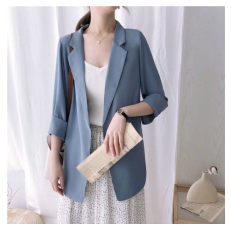

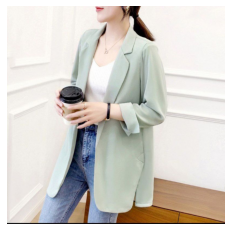

Folder ke: 1172


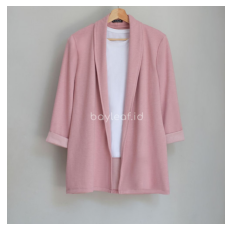

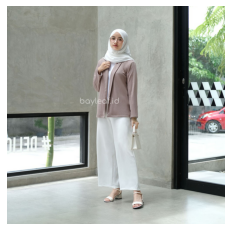

Folder ke: 1173


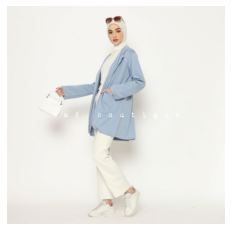

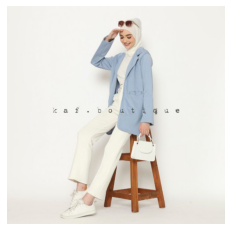

Folder ke: 1174


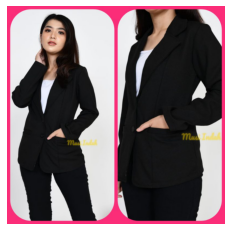

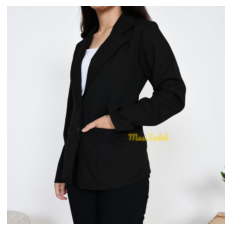

Folder ke: 1175


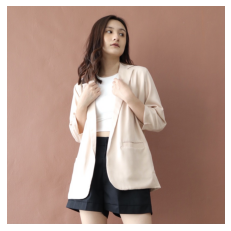

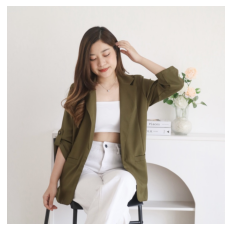

Folder ke: 1176


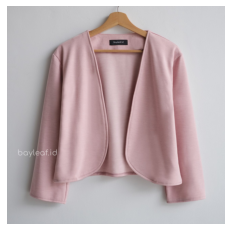

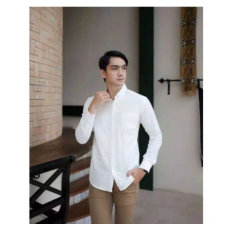

Folder ke: 1177


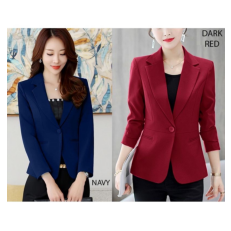

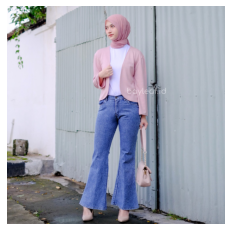

Folder ke: 1178


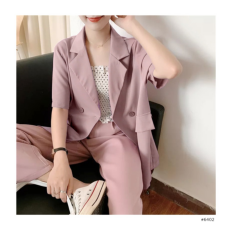

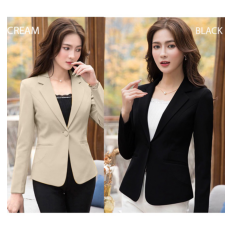

Folder ke: 1179


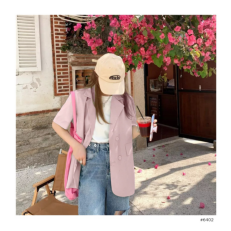

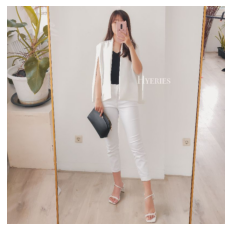

Folder ke: 1180


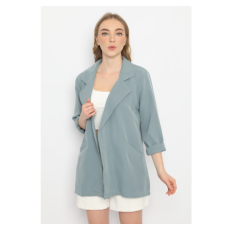

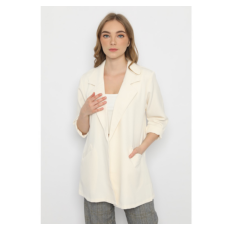

Folder ke: 1181


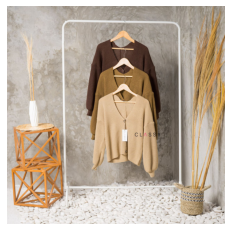

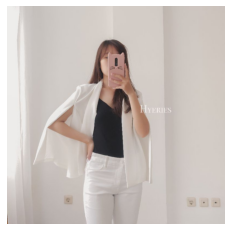

In [86]:
cek_gambar(gender_item,path_folder,name_folder_item)

In [ ]:
E:\affiliate Shopee\Pakaian wanita\Blazer Wanita\1171

In [78]:
os.listdir(r"E:\\affiliate Shopee\\Pakaian wanita\\Blazer Wanita\\1171")

['1.jpg', '2.jpg']